In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm

import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Let's take a general first order diffrential equation:

$$ a(x) \frac{dy}{dx} + b(x)y = c(x) $$

Not that here $a(x)\neq 0$ because if that is true that's it's not a diffrential equation anymore. So let's devide by $a(x)$.

$$\frac{dy}{dx} + \beta(x)y = \gamma(x) $$

This is the general form of a first order diffrential equation. Now let's say $A = \frac{dy}{dx}$ and $B = y$. Then

$$A + \beta(x)B = \gamma(x)$$

here $\beta(x)$ and $\gamma(x)$ are known function and $A$ and $B$ are the unknowns. We can write a Neural network which takes $\beta(x)$ as input and $\gamma(x)$ as ouput and then over iterations it can figure out $A$ and $B$.

Now if we put $\beta(x) = 1 \implies A + B = \gamma'(x)$ and $\beta(x) = -1 \implies A - B = \gamma''(x)$. Solving these two equations we get:

$$B = \frac{1}{2}(\gamma'(x) - \gamma''(x))$$

We would need to descretize the space. Let's say we want to solve the equation in a domain $[a,b]$, the we descretize the space in $N$ different points each time and feed that array as the input and output to the neural network.

For example, let's take the decay equation:

$$\frac{dy}{dx}+y=0$$, we will solve this equation in the range(0 ,1), we already now the solution, that is:

$$y(x) = C e^{-x}$$

here $\alpha(x) = 1$ and $\gamma(x) = 0$

In [31]:
#number of descrete points 
N = 100
total_batches = 1000
batch_size = 1000

def alpha(x):
    return np.cos(x)

def gamma(x):
    return np.sin(x)

def make_bacthes(batch_size):

    train_sample = np.zeros((batch_size, N))
    train_label  = np.zeros((batch_size, N))
    
    for i in range(batch_size):
        
        xs = np.random.uniform(0,1,size=N)
        alphas = alpha(xs)
        gammas = gamma(xs)
        
        train_sample[i,:] = alphas
        train_label[i,:] = gammas
        
    return train_sample, train_label

In [32]:
#make a neural network

net = Sequential()
net.add(Dense(2*N, input_shape=(N,), activation='relu'))
net.add(Dense(2*N, activation='relu'))
net.add(Dense(2*N, activation='relu'))
net.add(Dense(2*N, activation='relu'))
net.add(Dense(N, activation='linear'))

In [33]:
#complie the network
net.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')

In [34]:
#train
costs = []
for i in tqdm(range(total_batches)):
    train_sample, train_label = make_bacthes(batch_size)
    cost = net.train_on_batch(x=train_sample,y=train_label)
    costs.append(cost)

100%|███████████████████████████████████████| 1000/1000 [00:44<00:00, 22.66it/s]


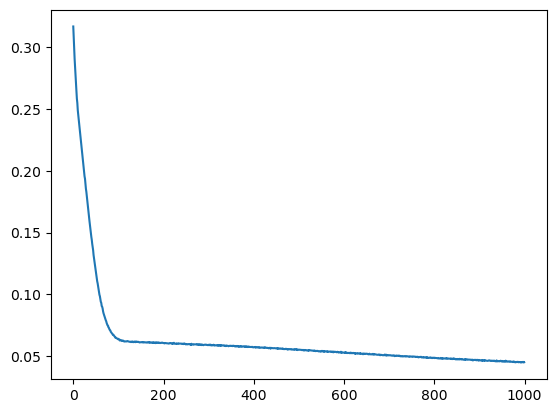

In [35]:
plt.plot(costs)

In [36]:
cost

0.04518260434269905

In [37]:
test_sample = np.zeros((1, N))
test_sample[0,:] = np.ones(N)

gamma_1 = net.predict(test_sample)

test_sample = np.zeros((1, N))
test_sample[0,:] = -1*np.ones(N)

gamma_2 = net.predict(test_sample)

1/1 [==============================] - 0s 30ms/step


In [38]:
B = 0.5*(gamma_1 + gamma_2)

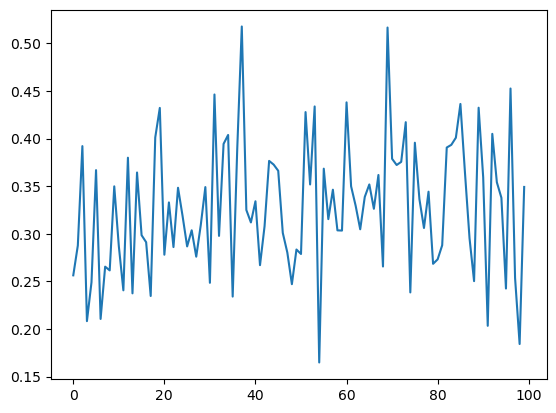

In [39]:
plt.plot(B[0])